In [40]:
from numpy import angle, unwrap, sin, cos, sum, reshape, abs, sqrt
from scipy.fft import fft

def ord_CebullaRm(sinal, tamanhoJanela, M):
    sinal = reshape(sinal[0:tamanhoJanela*M], (M,tamanhoJanela))

    FFT_SINAL = fft(sinal).transpose()
    
    for i in range(len(FFT_SINAL)):
      FFT_SINAL[i] = sorted(FFT_SINAL[i],key = abs)


    angulo = unwrap(angle(FFT_SINAL))

    s = np.empty(tamanhoJanela)
    c = np.empty(tamanhoJanela)
    for i in range(tamanhoJanela):          # i => rank number of the spectral component i
      for j in range(M):
        s[i] = s[i] + j*np.sin(angulo[i][j])
        c[i] = c[i] + j*np.cos(angulo[i][j])

    s = s/M
    c = c/M
    Rm =  np.sqrt(c**2+s**2)/(M*np.sqrt(M))       # modified rayleigh test

    return [FFT_SINAL,Rm]

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

from tqdm import tqdm
import numpy.random as rd
from numpy import quantile

nRuns = 1000
ord = []
ruido_t = []
M = 100

for i in tqdm(range(nRuns)):
    ruido_t.append(rd.randn(M**2))
    ord.append(ord_CebullaRm(ruido_t[i],M,M)[1])

limiar = quantile(a= ord, q = 1-0.01)
print('limiar = ', limiar)

100%|██████████| 1000/1000 [01:26<00:00, 11.58it/s]

limiar =  0.014551144887596512


C:\Users\alexa\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


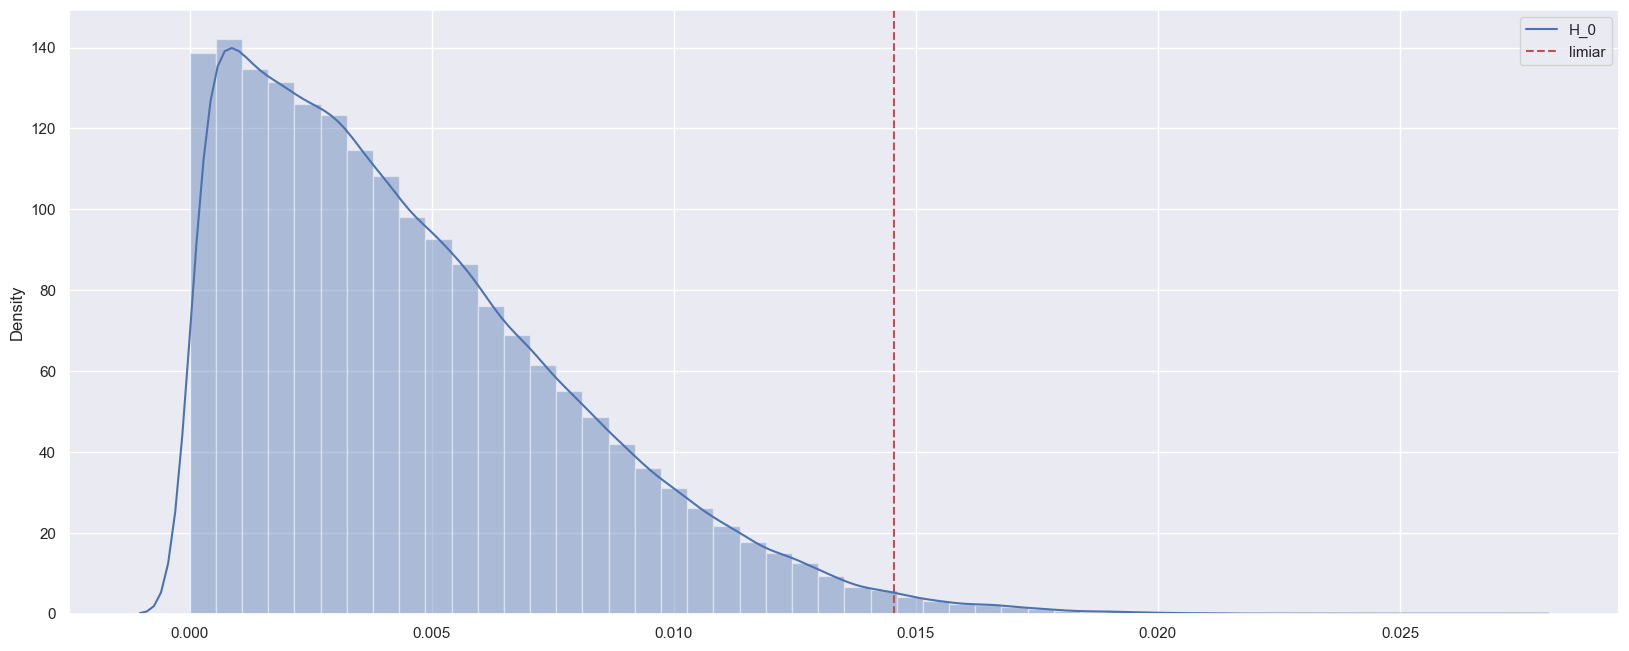

In [44]:
sns.distplot(ord)
plt.grid(True)
plt.axvline(limiar, 0,1,c='r',linestyle='--');
plt.legend(['H_0','limiar'])

In [29]:
a = [0+j,1,-2,6]
print(reshape(a,(2,2)))

[[ 0  1]
 [-2  6]]


In [42]:
N = 5;
sinal = rd.randn(N**2)
[FFT_SINAL,Rm] = ord_CebullaRm(sinal,N,N)

# sinal2 = reshape(sinal[0:N*N], (N,N))
# 
# print(abs(fft(sinal2)))

print("\n \n \n")
print(abs(FFT_SINAL))
print(abs(fft(sinal)))
print(FFT_SINAL)
print(Rm)


# plt.subplot(224);
# R = np.abs(FFT_SINAL)
# # Fr = fftfreq(len(R), d=1/fs)
# plt.stem(R);
#     # Fr[0:round(len(Fr)/2)],R[0:round(len(R)/2)]);
# # plt.stem(F[0:300],S[0:300])
# plt.ylabel('Magnitude da FFT');
# plt.xlabel('Frequência [Hz]');


 
 

[[0.32570272 1.21003803 1.21003803 3.55682271 3.55682271]
 [0.96999128 1.83885556 1.83885556 2.36878949 2.36878949]
 [1.41554738 1.41554738 2.08414669 2.08414669 3.03867944]
 [0.5775306  1.057099   1.057099   1.95288753 1.95288753]
 [0.2466569  1.93048554 1.93048554 2.98597514 2.98597514]]
[ 2.72526459  4.26121507  5.78238301  5.27956553  3.28327448  1.90985733
  1.11376462  1.76050634 10.33569013  1.20059657  1.2217842   7.00923031
  0.9974372   0.9974372   7.00923031  1.2217842   1.20059657 10.33569013
  1.76050634  1.11376462  1.90985733  3.28327448  5.27956553  5.78238301
  4.26121507]
[[ 0.32570272-0.j         -0.39375215+1.14418149j -0.39375215-1.14418149j
   2.62320634-2.40203587j  2.62320634+2.40203587j]
 [-0.96999128-0.j         -0.30577591+1.81325422j -0.30577591-1.81325422j
  -2.36585366+0.11789867j -2.36585366-0.11789867j]
 [-0.33572888+1.37515835j -0.33572888-1.37515835j -0.75633518-1.94206708j
  -0.75633518+1.94206708j  3.03867944-0.j        ]
 [ 0.5775306 -0.j     